<a href="https://colab.research.google.com/github/rubyvanrooyen/ARIWS-Cookbook/blob/main/0-Introduction/Fourier_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Fourier Transform

In [1]:
import numpy as np
import matplotlib.pylab as plt

Lets create a function which we will fourier transform. 
<br /> 
For now lets add together two cos functions with different periods and amplitudes. You can play with this later and create your own function.

In [2]:
# create an array of x-axis values, from 0 to 1000, with step size of 1
delta_n = 1.0
n_array = np.arange(0,1000.,delta_n)

# create two cos functions with specified periods and amplitudes
P1 = 100.
A1 = 1.0
fn1 = A1*np.cos(2.*np.pi*n_array/P1) 

P2 = 50.
A2 = 0.5
fn2 = A2*np.cos(2.*np.pi*n_array/P2)

# add the functions to form our array x to Fourier transform
x_array = fn1 + fn2

# print the periods and frequencies of the two components of our x array
print(f"Periods: {P1} {P2}")
print(f'Frequencies: {1./P1} {1./P2}')

Periods: 100.0 50.0
Frequencies: 0.01 0.02


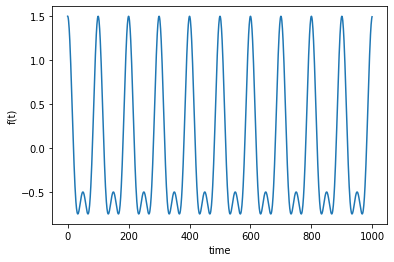

In [3]:
# plot our x array
plt.plot(n_array,x_array)
plt.xlabel('time')
plt.ylabel('f(t)')
plt.show() 

## Discrete Fourier Transform (DFT) 

Now we want to take the Fourier transform of our x array.

Lets remind ourselves of the definition of the Discrete Fourier Transform:

$$X(k) = \sum_{n=0}^{N-1} x(n) e^{-i 2 \pi n \frac{k}{N} }$$

where:

* $x(n)$ is the $n$th sample for the time-domain function (the DFT input).
* $N$ is the total number of samples.
* $X(k)$ is the output of the DFT for values of $k$ ranging from $-(N/2-1)$ to $N/2$.
* The integer values k correspond to frequencies $k/N$.

In [4]:
N = len(n_array)
k_array = np.arange(-(N/2.0-1.0),N/2.0,1.0)

X = np.zeros(len(k_array), dtype=np.complex)

# iterate over the fourier-space variable k
for k_indx,k in enumerate(k_array):
    # iterate over the original-space variable n
    for n_indx,n in enumerate(n_array):
        arg = x_array[n_indx]*np.exp(-1.j*2.0*np.pi*k*n/N)
        X[k_indx] = X[k_indx] + arg

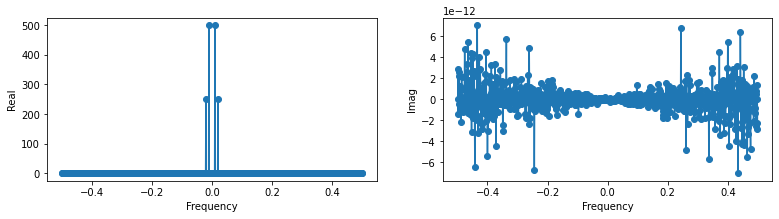

In [5]:
# create plot
f, ax = plt.subplots(1,2,figsize=[13,3])

ax[0].plot(k_array/N,X.real,'o-')
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('Real')

ax[1].plot(k_array/N,X.imag,'o-')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Imag')
plt.show()

Lets take a closer look at the real plot on the left:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


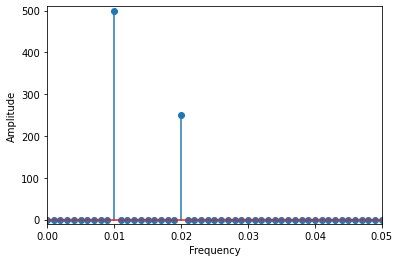

In [6]:
plt.stem(k_array/N,X.real)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.xlim(0,0.05)
plt.ylim(-10,510)
plt.show()

So we are seeing the Fourier Transform components of the two cos functions comprising our signal, at the frequencies we set them to: f1 and f2.

Some questions to think about:

* Why are the amplitudes different to the amplitudes A1 and A2 that we used to create the function?
* Why are there four spikes in the original unzoomed Fourier transform plot?